<a href="https://colab.research.google.com/github/PavankumarPandya14/ZEOTAP_OA/blob/main/FirstName_LastName_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

## Loading Dataset

In [2]:
# Load the dataset
customers_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE')
products_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0')
transactions_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF')

# Checking the shapes of the dataframes
customers_df.shape, products_df.shape, transactions_df.shape

((200, 4), (100, 4), (1000, 7))

## Exploratory Data Analysis (EDA)

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1),

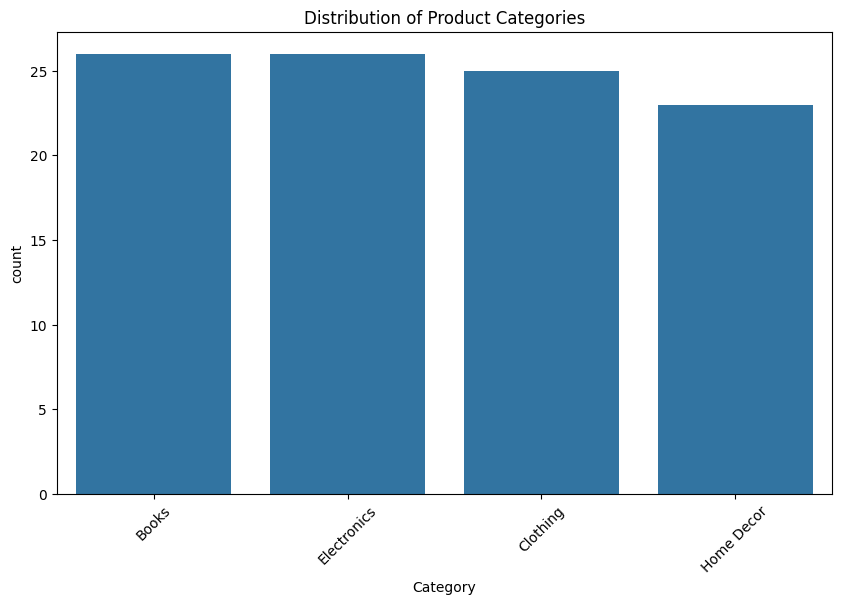

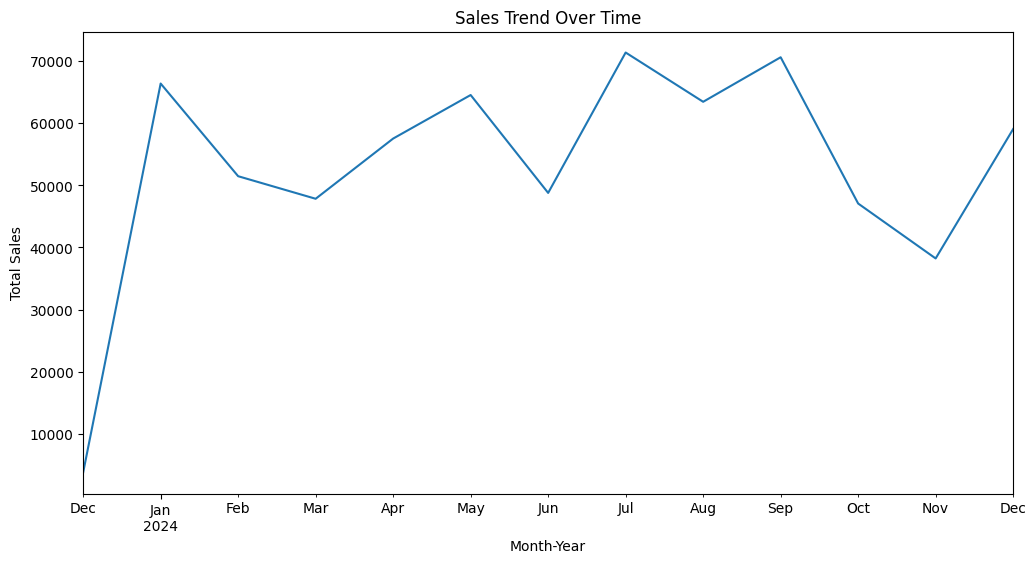

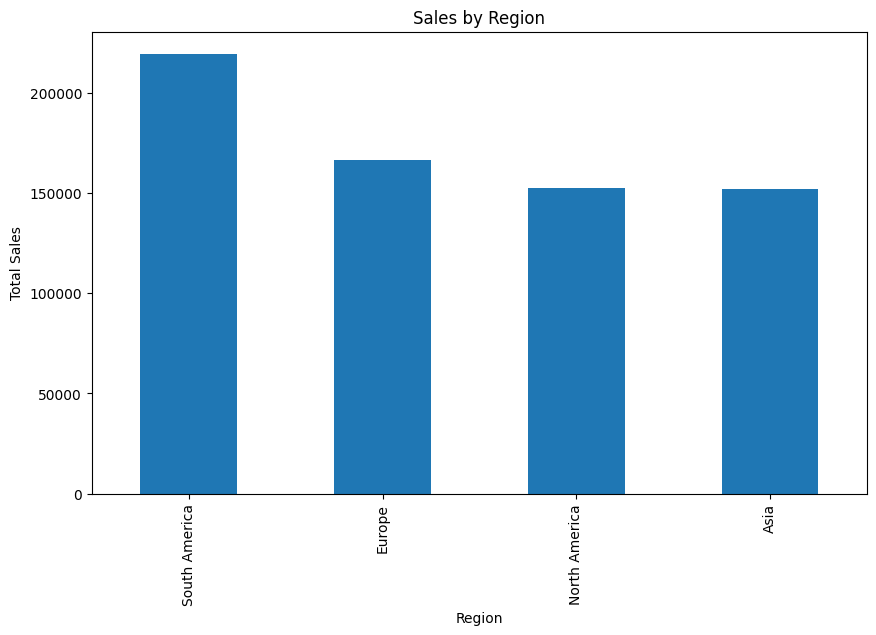

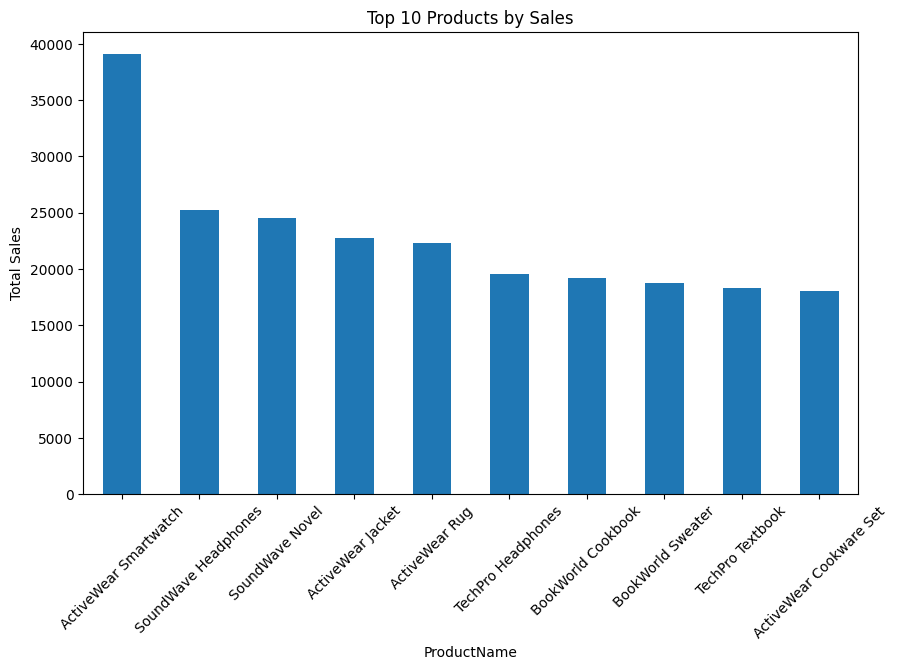

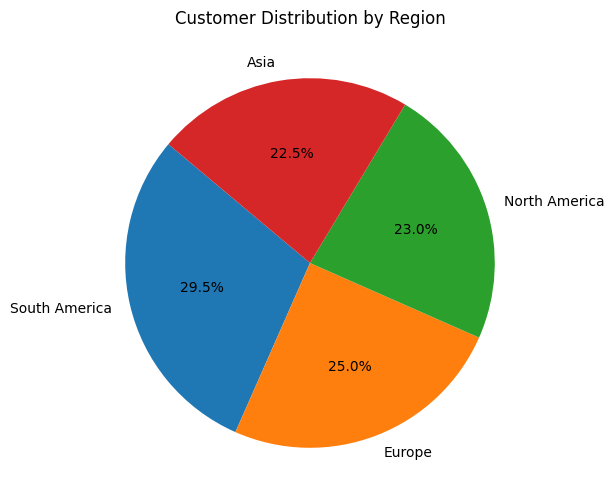

In [3]:
# Merge datasets for comprehensive analysis
merged_df = transactions_df.merge(products_df, on='ProductID').merge(customers_df, on='CustomerID')

# Basic data checks
print("Products Dataset:")
print(products_df.info())
print("Transactions Dataset:")
print(transactions_df.info())
print("Customers Dataset:")
print(customers_df.info())

# Summary statistics
print("Summary Statistics for Merged Data:")
print(merged_df.describe())

# Visualizations
# 1. Distribution of product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=products_df, x='Category', order=products_df['Category'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

# 2. Sales trend over time
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['MonthYear'] = merged_df['TransactionDate'].dt.to_period('M')
sales_trend = merged_df.groupby('MonthYear')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.show()

# 3. Sales by region
region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.show()

# 4. Top 10 products by sales
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# 5. Customer acquisition by region
customer_region = customers_df['Region'].value_counts()
plt.figure(figsize=(10, 6))
customer_region.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Customer Distribution by Region')
plt.ylabel('')
plt.show()

### Business Insights Derived from the Graphs:

1. **Category-Wise Distribution**:
   - Sales are evenly distributed across categories, with Books and Electronics leading slightly. This indicates balanced product performance, suggesting opportunities to expand product offerings in categories like Home Decor for better growth.

2. **Monthly Sales Trends**:
   - The sales trend exhibits a strong spike at the beginning of the year, suggesting potential seasonal demand (e.g., holiday sales). Businesses should leverage this trend by aligning promotions and inventory replenishment accordingly.

3. **Regional Sales Performance**:
   - South America dominates revenue generation, followed by Europe and North America. Marketing efforts should focus on these regions, while exploring growth strategies for Asia.

4. **Top Products by Sales**:
   - Products like "ActiveWear Smartwatch" and "SoundWave Headphones" lead in sales. Businesses can explore bundling or promotions for these products to further boost revenue.

5. **Customer Distribution by Region**:
   - Customers are fairly evenly distributed across regions, with South America and Europe slightly leading. This distribution suggests a potential for regional-specific marketing campaigns to maximize customer engagement.